In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from microfilm.microplot import microshow
import stackview
from skimage.data import cells3d


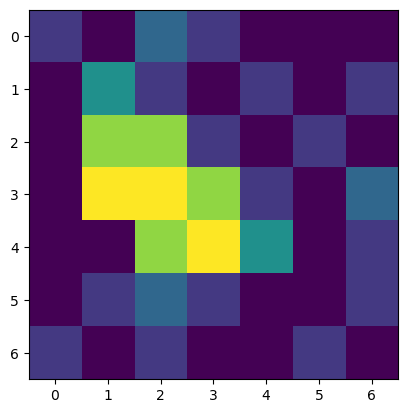

In [2]:
# create an artificial image
raw_image_array = [
    [1, 0, 2, 1, 0, 0, 0],
    [0, 3, 1, 0, 1, 0, 1],
    [0, 5, 5, 1, 0, 1, 0],
    [0, 6, 6, 5, 1, 0, 2],
    [0, 0, 5, 6, 3, 0, 1],
    [0, 1, 2, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0]
]
image = np.asarray(raw_image_array)
plt.imshow(image)
plt.show()

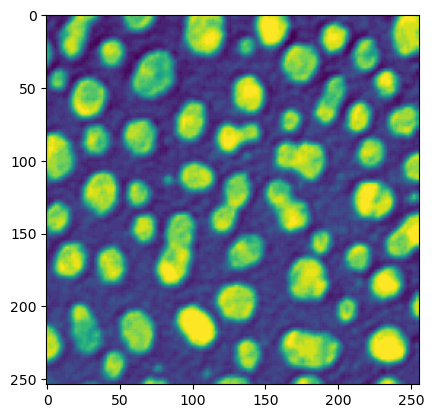

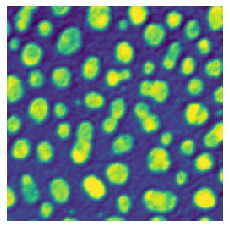

In [3]:
# load the image
filepath = "https://github.com/haesleinhuepf/BioImageAnalysisNotebooks/raw/main/data/blobs.tif"
blob_image = imread(filepath)

# display the image
plt.imshow(blob_image)

# display with microfilm
microshow(blob_image, cmaps='viridis')

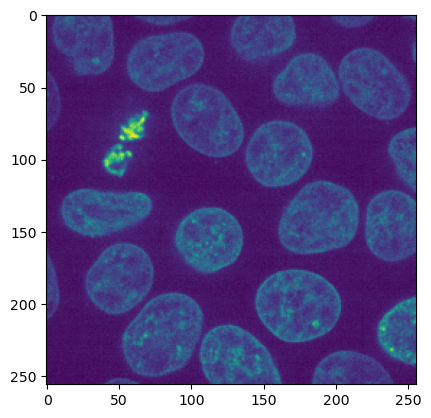

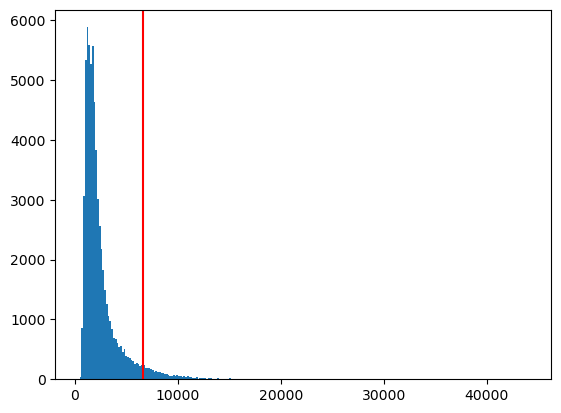

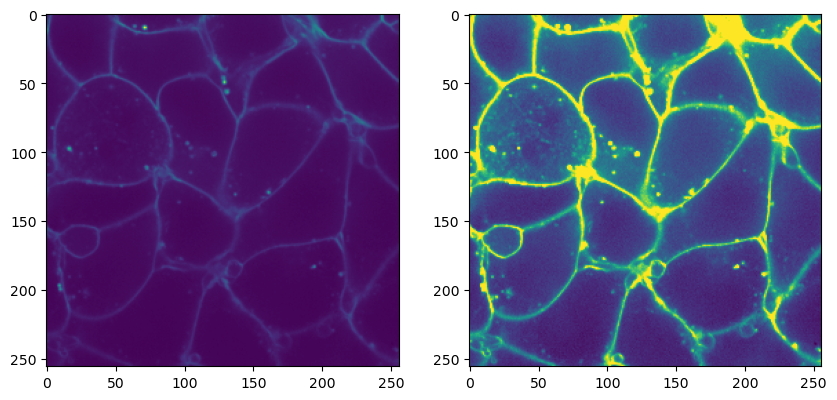

In [4]:
# load another image
cell_image = cells3d()[30]
plt.imshow(cell_image[0])
plt.imshow(cell_image[1])
plt.show()

# show with stackview
stackview.insight(cell_image[0])
stackview.insight(cell_image[1])

# check the range
# display image with range

plt.hist(cell_image[0].flatten(), bins=256)
limit0 = np.percentile(cell_image[0], 95)
limit1 = np.percentile(cell_image[1], 95)
plt.axvline(x=limit0, color='red')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cell_image[0], vmax=np.max(cell_image[0]))
ax[1].imshow(cell_image[0], vmax=limit0)
plt.show()

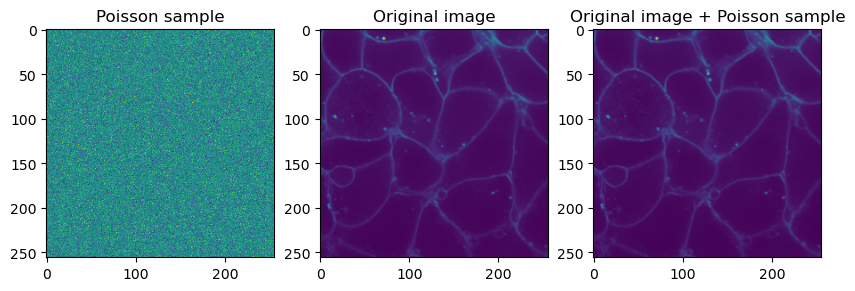

In [5]:
lam = cell_image[0].flatten().mean()
size = cell_image[0].flatten().size
poisson_sample = np.random.poisson(lam= lam, size=size)
poisson_sample = poisson_sample.reshape(cell_image[0].shape)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title('Poisson sample')
ax[0].imshow(poisson_sample)
ax[1].set_title('Original image')
ax[1].imshow(cell_image[0])
ax[2].set_title('Original image + Poisson sample')
ax[2].imshow(cell_image[0] + poisson_sample)
plt.show()



Whats the shape of the blob image?
(254, 256)


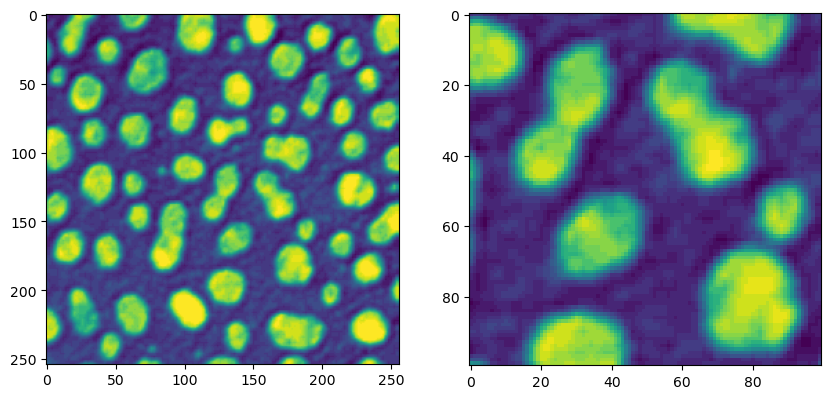

In [6]:
# crop the image
print("Whats the shape of the blob image?")
print(blob_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(blob_image)
ax[1].imshow(blob_image[100:200, 100:200])
plt.show()


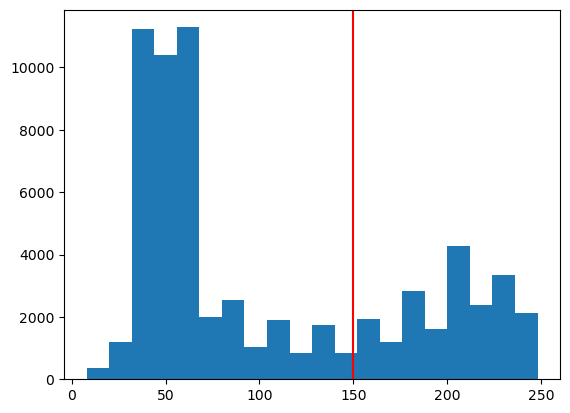

Lets set the threshold to 150


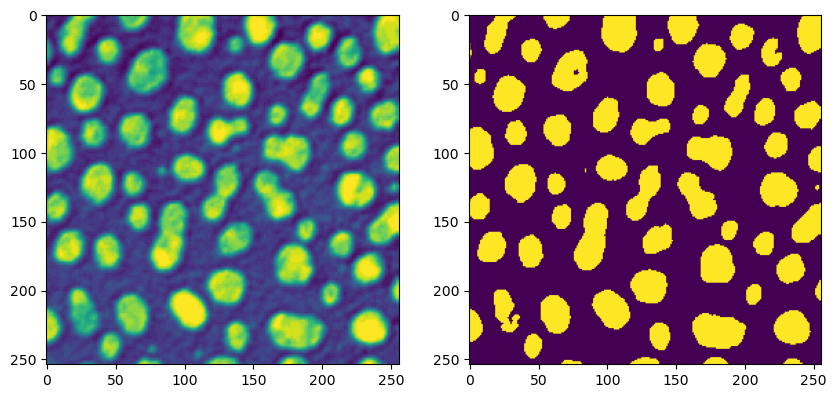

In [7]:
plt.hist(blob_image.flatten(), bins=20);
plt.axvline(x=150, color='red')
plt.show()
print("Lets set the threshold to 150")

blob_image_thresholded = blob_image > 150

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(blob_image)
ax[1].imshow(blob_image_thresholded)
plt.show()


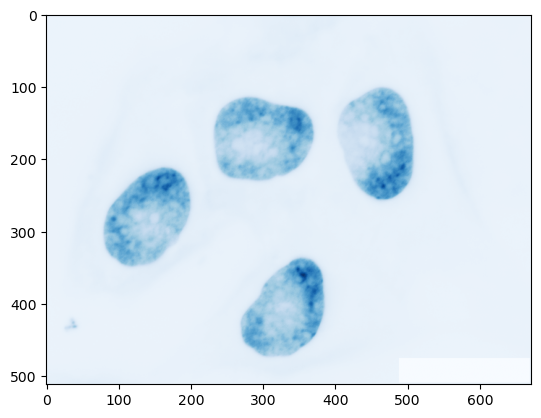

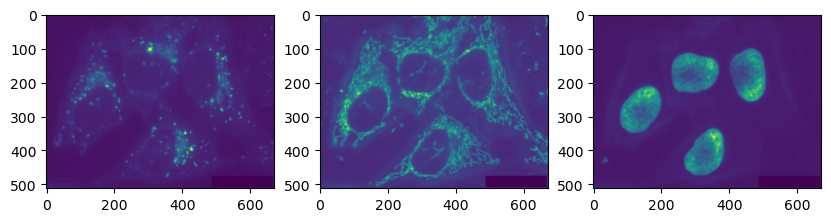

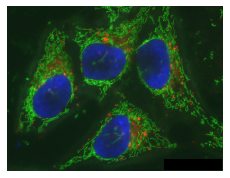

In [8]:
# display hela cell image with 3 channels
image = imread('data/hela-cells.tif')
image_moved = np.moveaxis(image,-1, 0)

plt.imshow(image_moved[0], cmap="Reds")
plt.imshow(image_moved[1], cmap="Greens")
plt.imshow(image_moved[2], cmap="Blues")
plt.show()

# display separate channels
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image_moved[0])
ax[1].imshow(image_moved[1])
ax[2].imshow(image_moved[2])
plt.show()

microshow(image_moved, cmaps=['pure_red', 'pure_green', 'pure_blue'],);


### Image normalization

In [25]:
# some methods for normalisation

def min_max_normalization(image):
    return (image - image.min()) / (image.max() - image.min())

def z_score_normalization(image):
    return (image - image.mean()) / image.std()

def perenttile_normalization(image, upper_percentile=95, lower_percentile=5):
    upper_lim = np.percentile(image, upper_percentile)
    lower_lim = np.percentile(image, lower_percentile)
    return (image - lower_lim) / (upper_lim - lower_lim)

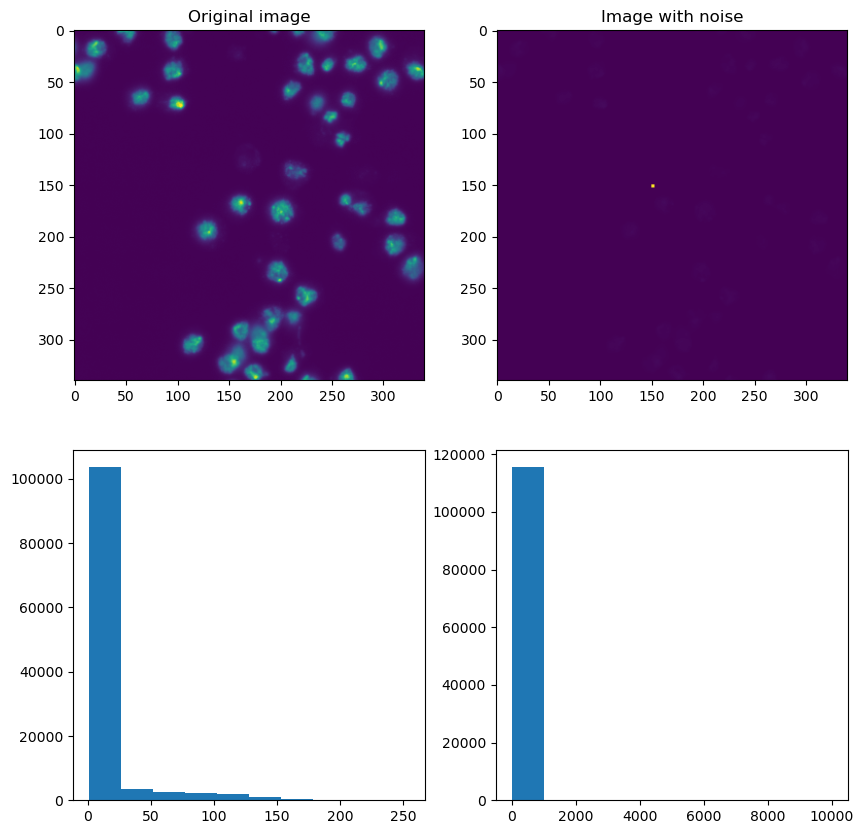

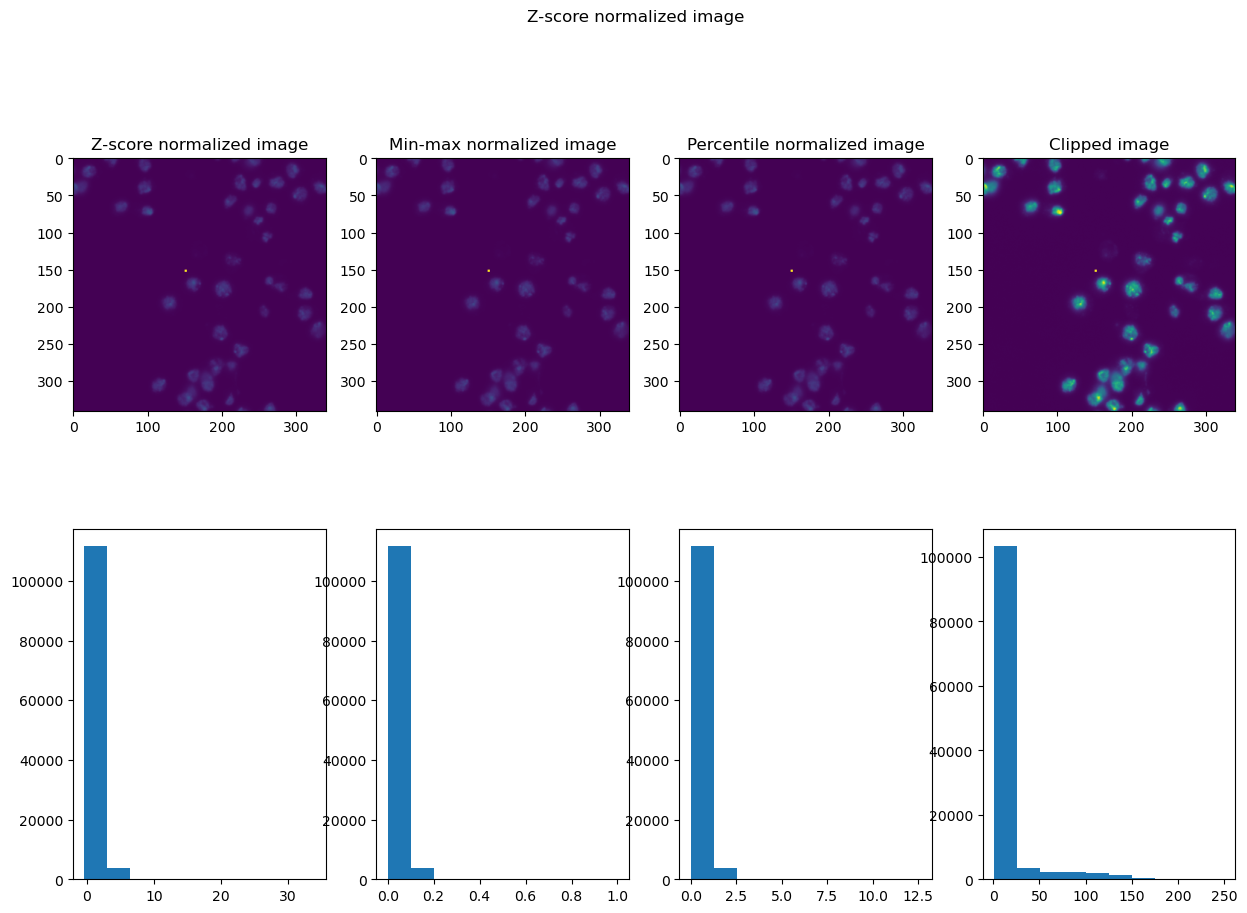

In [51]:
filepath = 'data/BBBC007_batch/17P1_POS0013_D_1UL.tif'
image = imread(filepath)
# show image
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(image)
ax[1, 0].hist(image.flatten())
ax[0, 0].set_title("Original image")
# lets add some noise
image[150:153, 150:153] = 10000

ax[0, 1].imshow(image)
ax[1, 1].hist(image.flatten())
ax[0, 1].set_title("Image with noise")
plt.show()

# lets add some noise
image[150:153, 150:153] = 1000

# lets see how the image with noise looks like with different kinds of normalization
# zscore normalization
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle("Z-score normalized image")
image_zscore = z_score_normalization(image)
ax[0, 0].imshow(image_zscore)
ax[1, 0].hist(image_zscore.flatten())
ax[0, 0].set_title("Z-score normalized image")

image_minmax = min_max_normalization(image)
ax[0, 1].imshow(image_minmax)
ax[1, 1].hist(image_minmax.flatten())
ax[0, 1].set_title("Min-max normalized image")

image_percentile = perenttile_normalization(image, upper_percentile=95, lower_percentile=5)
ax[0, 2].imshow(image_percentile)
ax[1, 2].hist(image_percentile.flatten())
ax[0, 2].set_title("Percentile normalized image")

# clip the image first
image_clip = np.clip(image, 0, 250)
ax[0, 3].imshow(image_clip)
ax[1, 3].hist(image_clip.flatten())
ax[0, 3].set_title("Clipped image")

plt.show()